# Read VTK file and plot with matplotlib

## Install vtk

```
brew install vtk --without-python@2 --with-python
```

## Read the file 

In [1]:
import numpy as np
import vtk
from vtk.util.numpy_support import vtk_to_numpy

reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName("pep1_7_OmegaV.vtu")
reader.Update()
data = reader.GetOutput()

## Get mesh data

In [2]:
reader.GetNumberOfPoints()

18937

In [3]:
reader.GetNumberOfCells()

37440

In [4]:
reader.GetNumberOfPointArrays()

3

### Points

In [5]:
points = data.GetPoints()
npts = points.GetNumberOfPoints()
x = vtk_to_numpy(points.GetData())

### Cells

In [6]:
triangles=  vtk_to_numpy(data.GetCells().GetData())
triangles[:4]

array([   3, 3773, 3761, 3759])

In [7]:
triangles[4:8]

array([   3, 3761, 3773, 3792])

In [8]:
ntri = triangles.size//4  # number of cells
ntri

37440

In [9]:
tri = np.take(triangles,[n for n in range(triangles.size) if n%4 != 0]).reshape(ntri,3)
tri

array([[3773, 3761, 3759],
       [3761, 3773, 3792],
       [3771, 3792, 3773],
       ...,
       [ 874,  902, 1511],
       [1510, 1511,  902],
       [1511, 1506,  874]])

### Field values

In [10]:
n_arrays = reader.GetNumberOfPointArrays()
for i in range(n_arrays):
    print(reader.GetPointArrayName(i))

real_part_term_u
imag_part_term_u
abs_term_u


In [11]:
u = vtk_to_numpy(data.GetPointData().GetArray(2))


In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)

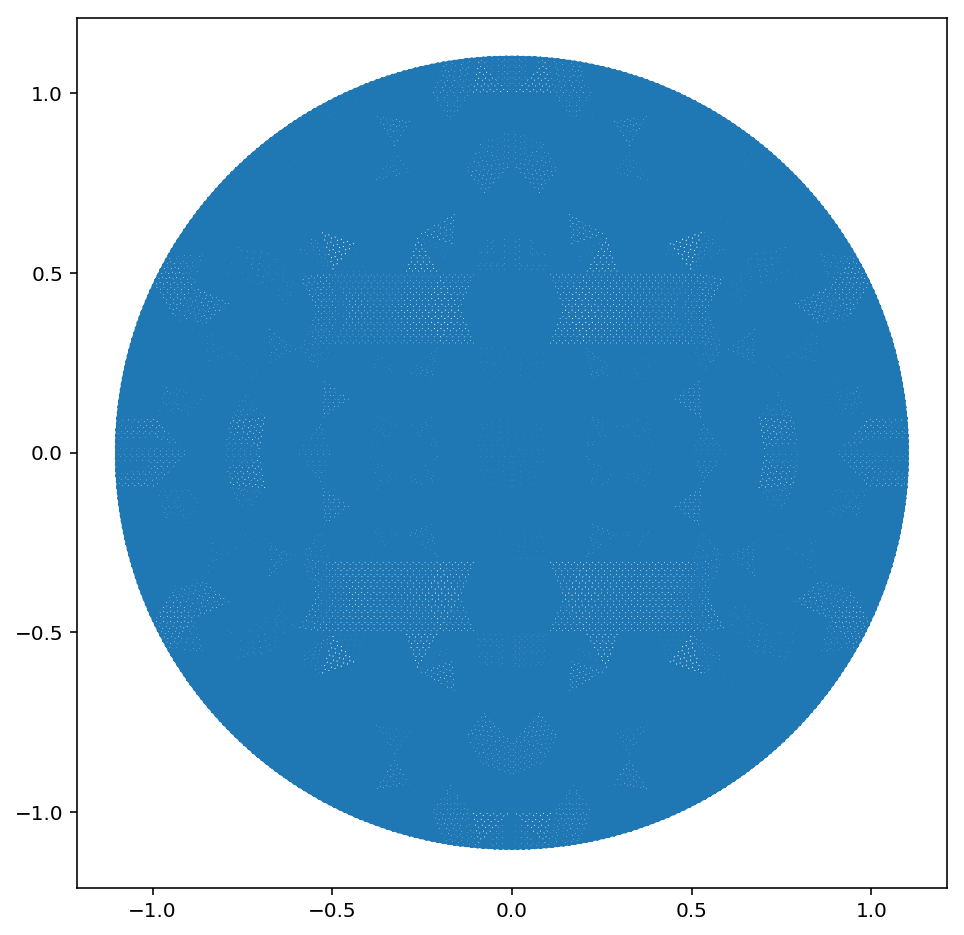

In [13]:
# Mesh
plt.figure(figsize=(8, 8))
plt.triplot(x[:,0], x[:,1], tri)
plt.gca().set_aspect('equal')

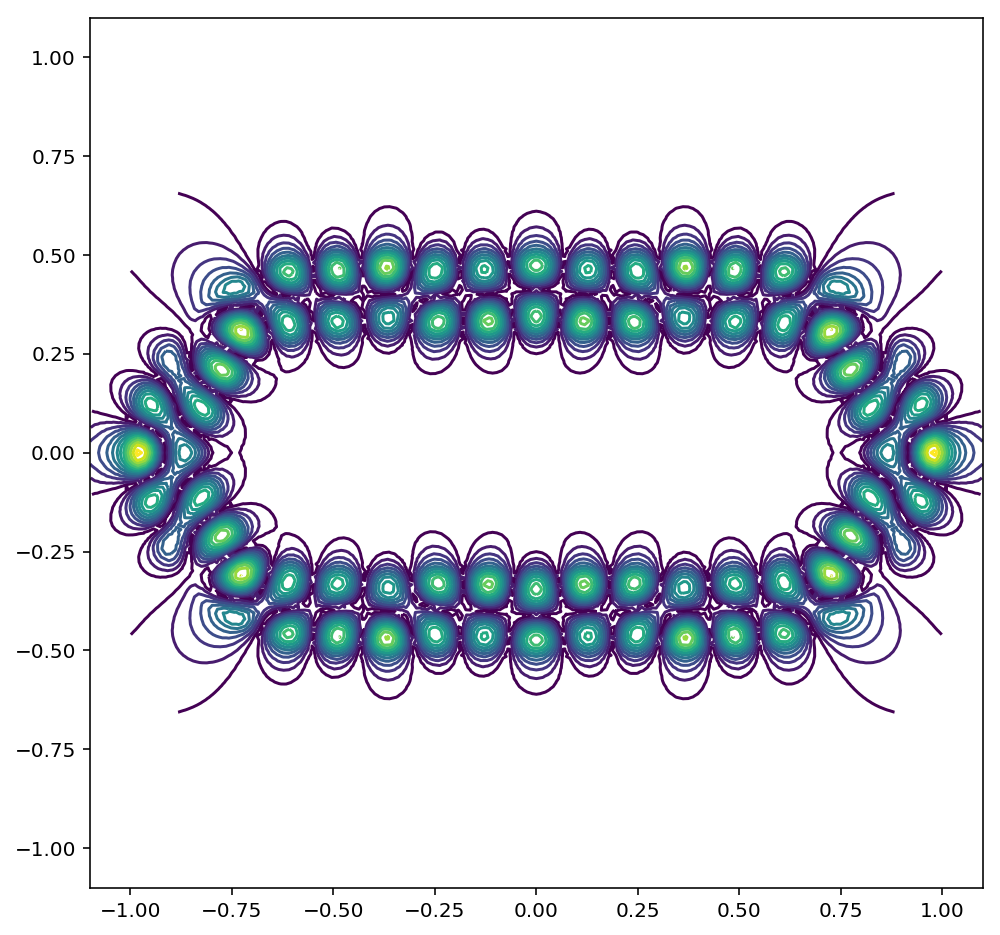

In [14]:
# abs_u 
plt.figure(figsize=(8, 8))
plt.tricontour(x[:,0], x[:,1], tri, u, 16);

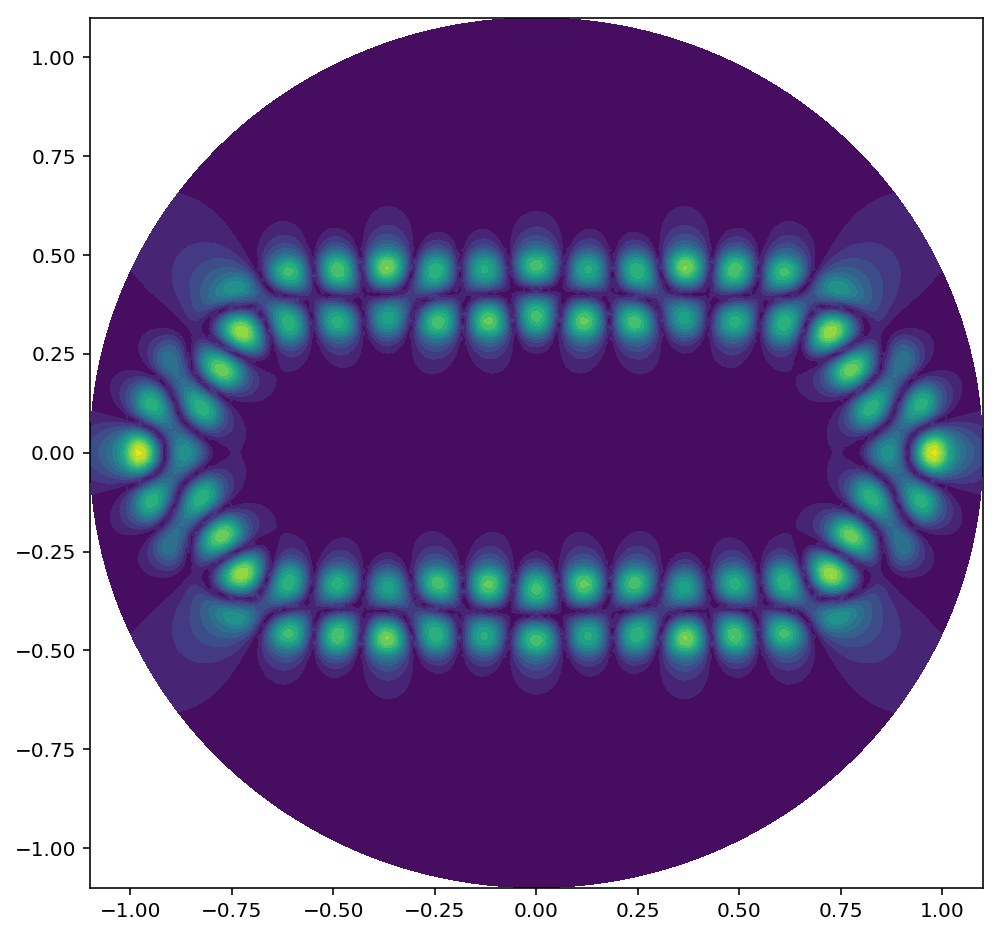

In [15]:
plt.figure(figsize=(8, 8))
plt.tricontourf(x[:,0], x[:,1], tri, u, 16);

## References
- [Reading VTK files in Python via python-vtk](http://forrestbao.blogspot.fr/2011/12/reading-vtk-files-in-python-via-python.html)
- [VTK Polygons and other cells as vtkCellArray in Python](http://forrestbao.blogspot.fr/2012/06/vtk-polygons-and-other-cells-as.html)
- [Plot VTK with matplotlib](https://gist.github.com/mrklein/44a392a01fa3e0181972)